# Dataset

In [2]:
import pandas as pd

In [4]:
twitch_streamers_df = pd.read_csv('twitchdata-update.csv')
twitch_streamers_df.head(5)



,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [5]:
twitch_games_df = pd.read_csv('Twitch_game_data.csv')
twitch_games_df.head(5)

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


# Formatting

In [6]:
twitch_games_df.to_excel("simple_ex.xlsx")

In [7]:

# Instead of directly creating an Excel, create an object ExcelWriter()
writer = pd.ExcelWriter('Twitch Report.xlsx', engine='xlsxwriter')
workbook = writer.book # Will be used to add attributes to the workbook
# Creating the first worksheet (tab)
twitch_games_df.to_excel(
    writer, 
    'Twitch Top Games', # worksheet name
    index = False # index does not contain relevant information
) 
games_sheet = writer.sheets['Twitch Top Games'] # Assigning a variable to the sheet allows formatting
# Creating the second worksheet (tab)
twitch_streamers_df.to_excel(
    writer, 
    'Twitch Top Streamers', 
    index = False 
) 
streamers_sheet = writer.sheets['Twitch Top Streamers']

# We created the "base" file now it's time for formatting!
# Please note - to avoid repetitions (we just want to learn!) let's format only the first tab, "games_sheet"

# First create a custom cell formatting  
general_format = workbook.add_format({'align': 'center', 'valign': 'vcenter'})  
# Please note, formatting can go far beyond alignment, check out: https://xlsxwriter.readthedocs.io/format.html
# Setting cell formating and changing columns width
games_sheet.set_column(0, # First col
                       10, # last col
                       20, # Col width
                       general_format)
# Changing the height of the first row (header) to 20
games_sheet.set_row(0, 20)
# Creating an auto filter based on data size
games_sheet.autofilter(
    0, 0, # First two arguments are the coordinates of the first cell, in this case, "A1" 
    twitch_games_df.shape[0], # Last row
    twitch_games_df.shape[1]-1)# last col (starts on 0)
# Freezing first row
games_sheet.freeze_panes(1, 0) 

# Create header format
header_format = workbook.add_format(
    {'bold': True,
     'font_color': 'white',
     'bg_color':'#046ed1', # cell background hex color
     'align': 'center',
     'valign': 'vcenter'
    })
# Create a list with new columns names (removing snake_case)
new_col_names = [i.replace('_',' ').title() for i in twitch_games_df.columns]
# Rewrite new names with the new formatting
games_sheet.write_row('A1', new_col_names,header_format)

# Important!! Don't forget to close the file!
workbook.close()

In [8]:
twitch_games_df.to_csv('Twitch_game_data.csv',index = False)

# Adding img exemple

In [ ]:
writer = pd.ExcelWriter('insert_img_ex.xlsx', engine='xlsxwriter')
any_df.to_excel(writer, 'my_sheet') 
my_sheet = writer.sheets['my_sheet']

my_sheet.insert_image(
    'D2', #  Upper left corner of the image position
    r'my_img.png', # Img path
    {'x_scale': 0.6,'y_scale': 0.6,'x_offset':1}) # Adjusting image size and position

workbook.close()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [10]:

def millions_formatter(x, pos):
    'The two args are the value and tick position'
    return f'{x/10**6:.0f}M'



In [26]:
def avg_top_streamers_viewrs_img(twitch_streamers_df:pd.DataFrame,save_path:str = 'img.png'):
    """Plot and save a png img about the Watch Time of of top 10 streamers.
    """

    formatter = FuncFormatter(millions_formatter) # Million format
    sns.set_style('white')
    fig,ax1 = plt.subplots(figsize=(15,5))

    sns.barplot(x=twitch_streamers_df[:10]['Watch time(Minutes)'],
                y=twitch_streamers_df[:10].Channel,
                color ='#b2b2d9',
                ax = ax1)

    ax1.set_title("Watch Time of Top 10 Streamers (Million Minutes)",fontsize = 24, loc = 'left')
    ax1.set_xlabel("",fontsize=16, loc = 'left')
    ax1.set_ylabel("",fontsize=16, loc ='top')
    ax1.tick_params(labelsize=16)

    ax1.xaxis.tick_top() # Move x axis to top
    sns.despine(bottom = True, left = True) # remove borders 
    ax1.xaxis.set_major_formatter(formatter) # set M format 
    
    plt.savefig(save_path,facecolor= '#ffffff',edgecolor = '#ffffff',bbox_inches ='tight') 

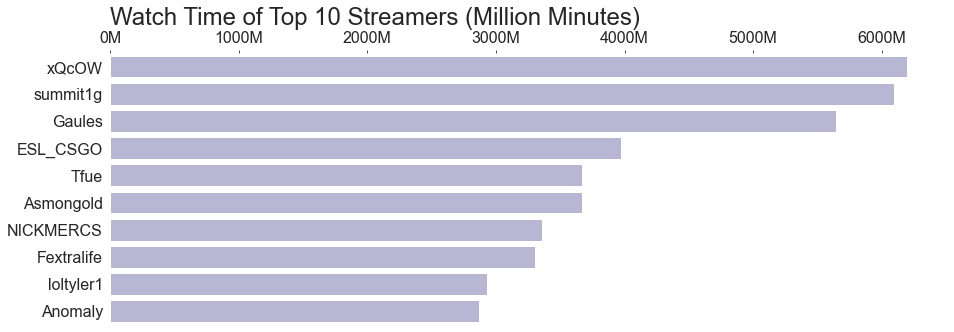

In [29]:
import os 

writer = pd.ExcelWriter('insert_img_ex.xlsx', engine='xlsxwriter')
workbook = writer.book
pd.DataFrame().to_excel(writer, 'Sheet with image') 
my_sheet = writer.sheets['Sheet with image']

# Hide gridline
my_sheet.hide_gridlines(2)
# Insert img
avg_top_streamers_viewrs_img(twitch_streamers_df) # create img
my_sheet.insert_image(
    'B3', #  Upper left corner of the image position
    r'img.png', # Img path
    {'x_scale': 0.6,'y_scale': 0.6,'x_offset':1}) # Adjusting image size and position

workbook.close()

# Delete img
os.remove('img.png')

# Formulas

In [25]:
writer = pd.ExcelWriter('Twitch Streamers.xlsx', engine='xlsxwriter')
workbook = writer.book
twitch_streamers_df.to_excel(writer, 'Sheet with Formula',index = False) 
my_sheet = writer.sheets['Sheet with Formula']

# Formula must be written as a string, in excel formula format, in english
# To dynamically define the range of the formula, find the value of the df size
row_number = len(twitch_streamers_df) +1
formula = '=B2:B'+ str(row_number) + '/ C2:C' + str(row_number) 
my_sheet.write_array_formula('L2:L' + str(row_number),formula) 
# Write col name
my_sheet.write('L1', 'watch_time_rate')
workbook.close()

In [17]:
twitch_streamers_df

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English
